<a href="https://colab.research.google.com/github/ibudeX/Bank-Loan-EDA-and-Prediction/blob/main/EDA_on_Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("udaymalviya/bank-loan-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/udaymalviya/bank-loan-data/versions/1


In [ ]:
import os
os.listdir(path)

['loan_data.csv']

In [ ]:
data=pd.read_csv(os.path.join(path,'loan_data.csv'))
data.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

First thing we load our data

Let get the basic info using .info(),.describ()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

As we can see no Null entries, there are 45000 entries and 14 columns

In [ ]:
data.describe().T

count          mean           std      min  \
person_age                  45000.0     27.764178      6.045108    20.00   
person_income               45000.0  80319.053222  80422.498632  8000.00   
person_emp_exp              45000.0      5.410333      6.063532     0.00   
loan_amnt                   45000.0   9583.157556   6314.886691   500.00   
loan_int_rate               45000.0     11.006606      2.978808     5.42   
loan_percent_income         45000.0      0.139725      0.087212     0.00   
cb_person_cred_hist_length  45000.0      5.867489      3.879702     2.00   
credit_score                45000.0    632.608756     50.435865   390.00   
loan_status                 45000.0      0.222222      0.415744     0.00   

                                 25%       50%       75%         max  
person_age                     24.00     26.00     30.00      144.00  
person_income               47204.00  67048.00  95789.25  7200766.00  
person_emp_exp                  1.00      4.00      8.00      125.00  
loan_amnt                    5000.00   8000.00  12237.25    35000.00  
loan_int_rate                   8.59     11.01     12.99       20.00  
loan_percent_income             0.07      0.12      0.19        0.66  
cb_person_cred_hist_length      3.00      4.00      8.00       30.00  
credit_score                  601.00    640.00    670.00      850.00  
loan_status                     0.00      0.00      0.00        1.00

The describe tell us that majority of the people takeing loan are of the age 30, they range from 144 to 20 years. loan status is telling us of two option takeing or not thee average income is btw 7.2 mill to 81000 with majority less than 1m. loan amount is from9.5 k to 35k with majority below 12.2k

Next we chaek for duplicate

In [ ]:
data.duplicated().sum()

np.int64(0)

Lets check the uniqueness and ount for loan status

In [ ]:
data.loan_status.unique()

array([1, 0])

In [ ]:
data.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

Looking at this the peridiction will be bias because more than half of the data is for false and not enough for true

Lets plot graph for mor insight

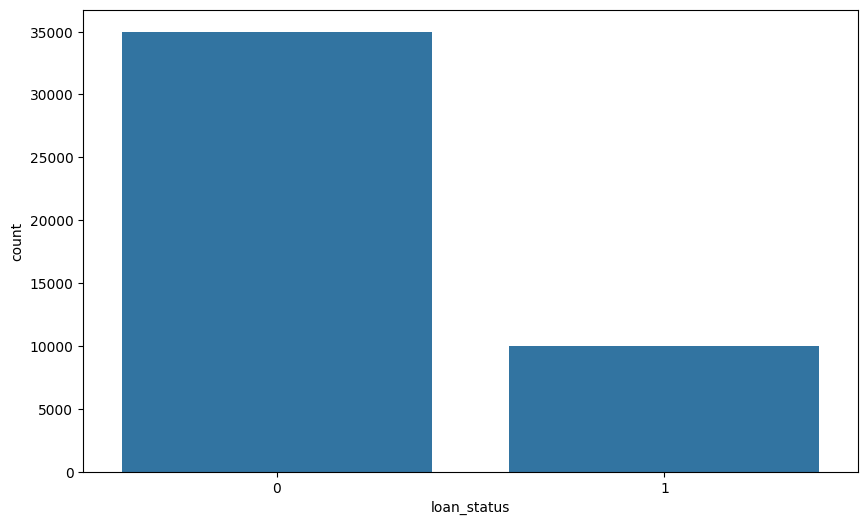

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status',data=data)

plt.show()  #to show the count of each ategory on loan status

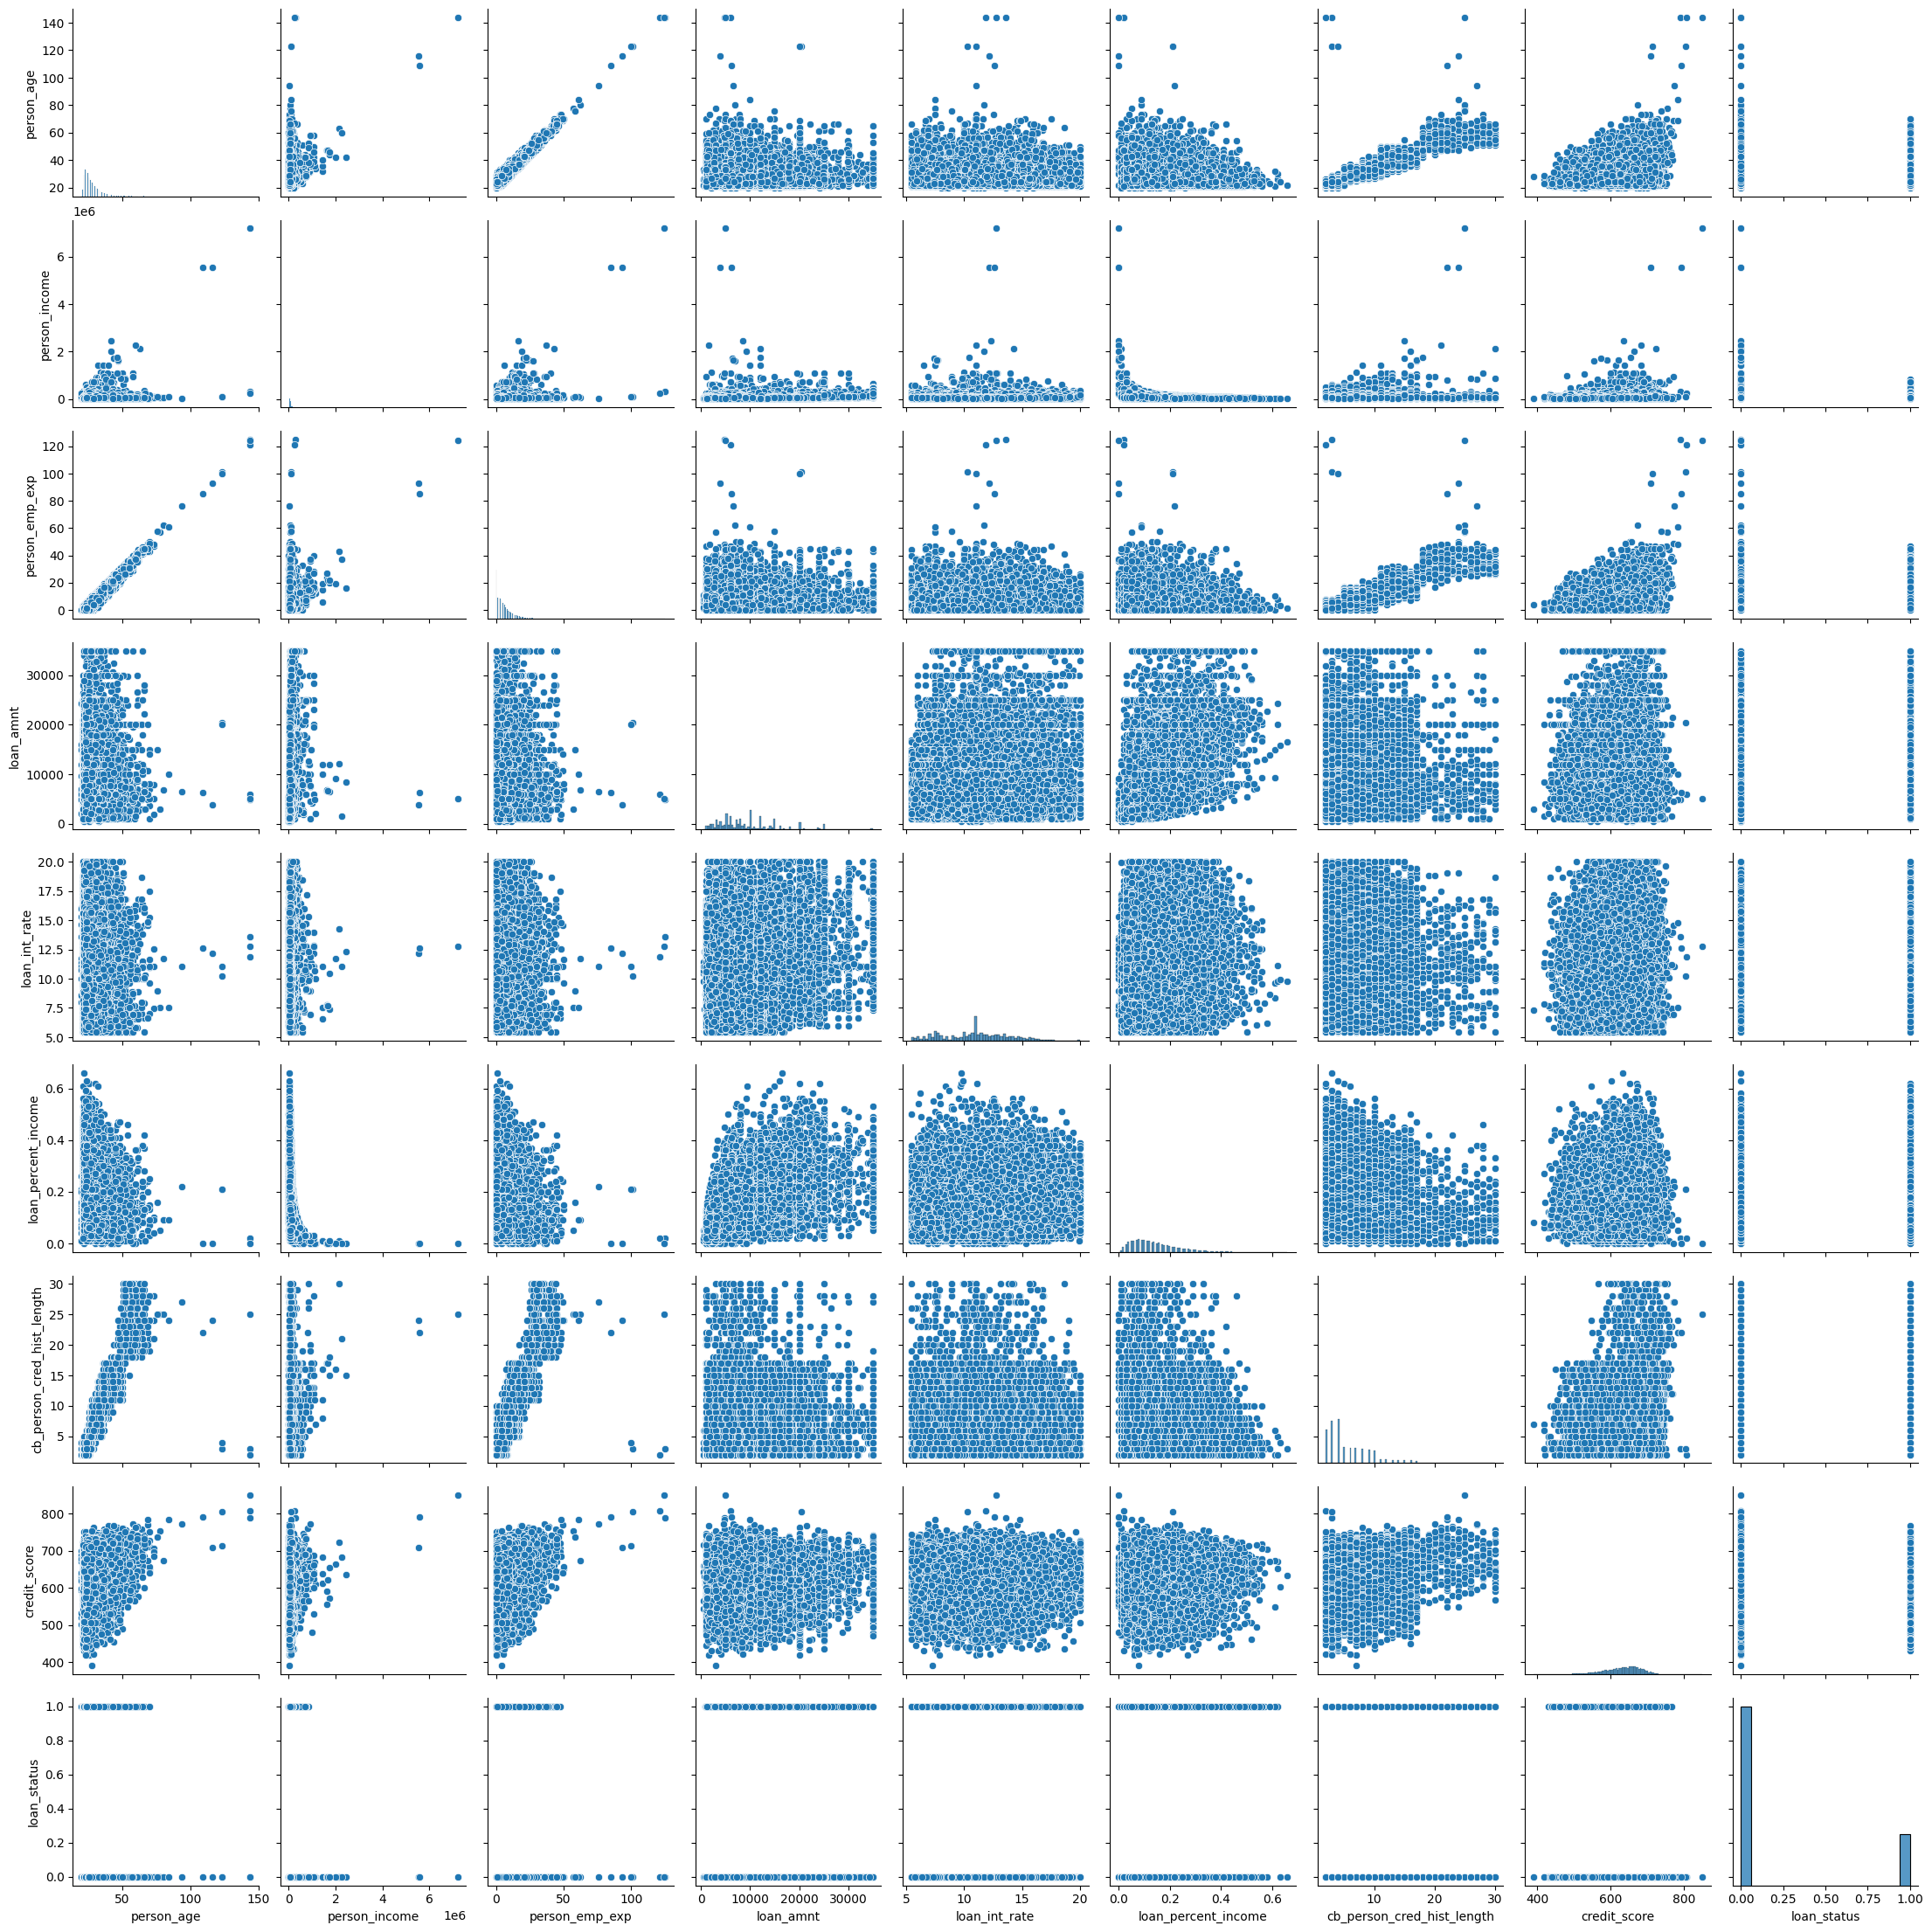

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
corr_data = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation
corr_data

person_age  person_income  person_emp_exp  \
person_age                    1.000000       0.193698        0.954412   
person_income                 0.193698       1.000000        0.185987   
person_emp_exp                0.954412       0.185987        1.000000   
loan_amnt                     0.050750       0.242290        0.044589   
loan_int_rate                 0.013402       0.001510        0.016631   
loan_percent_income          -0.043299      -0.234177       -0.039862   
cb_person_cred_hist_length    0.861985       0.124316        0.824272   
credit_score                  0.178432       0.035919        0.186196   
loan_status                  -0.021476      -0.135808       -0.020481   

                            loan_amnt  loan_int_rate  loan_percent_income  \
person_age                   0.050750       0.013402            -0.043299   
person_income                0.242290       0.001510            -0.234177   
person_emp_exp               0.044589       0.016631            -0.039862   
loan_amnt                    1.000000       0.146093             0.593011   
loan_int_rate                0.146093       1.000000             0.125209   
loan_percent_income          0.593011       0.125209             1.000000   
cb_person_cred_hist_length   0.042969       0.018008            -0.031868   
credit_score                 0.009074       0.011498            -0.011483   
loan_status                  0.107714       0.332005             0.384880   

                            cb_person_cred_hist_length  credit_score  \
person_age                                    0.861985      0.178432   
person_income                                 0.124316      0.035919   
person_emp_exp                                0.824272      0.186196   
loan_amnt                                     0.042969      0.009074   
loan_int_rate                                 0.018008      0.011498   
loan_percent_income                          -0.031868     -0.011483   
cb_person_cred_hist_length                    1.000000      0.155204   
credit_score                                  0.155204      1.000000   
loan_status                                  -0.014851     -0.007647   

                            loan_status  
person_age                    -0.021476  
person_income                 -0.135808  
person_emp_exp                -0.020481  
loan_amnt                      0.107714  
loan_int_rate                  0.332005  
loan_percent_income            0.384880  
cb_person_cred_hist_length    -0.014851  
credit_score                  -0.007647  
loan_status                    1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

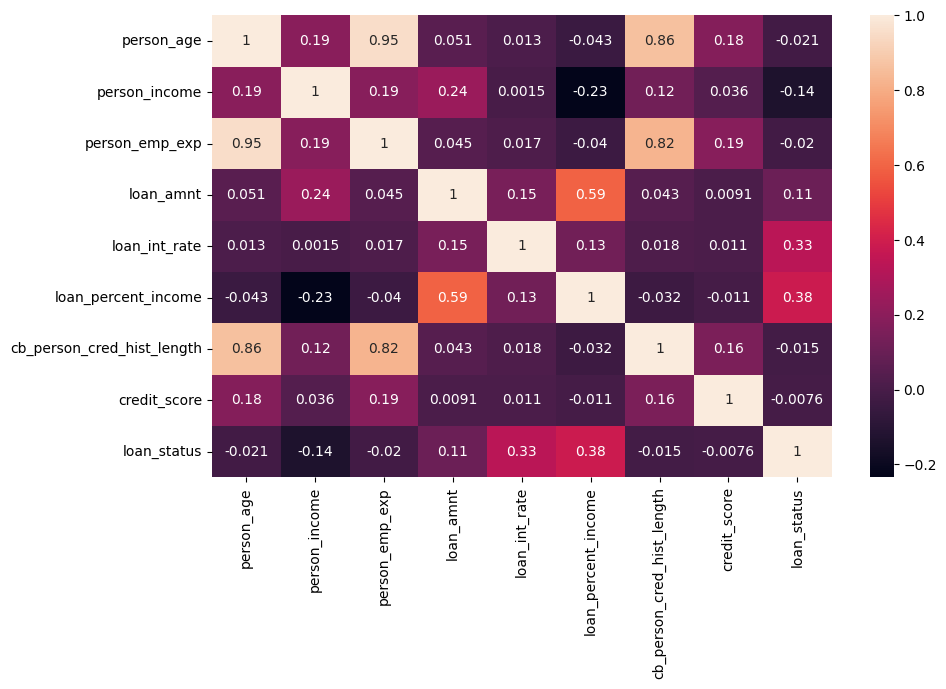

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_data,annot=True)
plt.show

In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

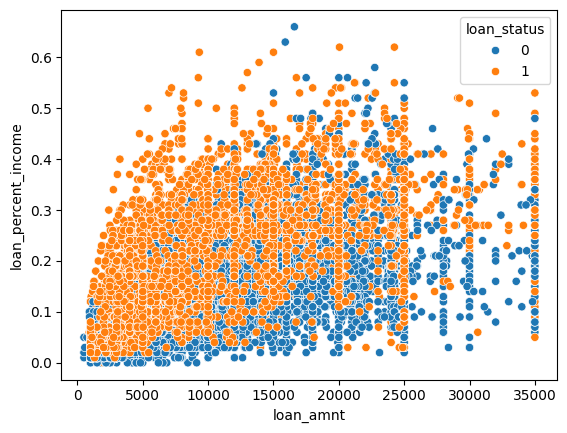

In [ ]:
sns.scatterplot(x='loan_amnt',y='loan_percent_income',data=data,hue= 'loan_status')
plt.show()


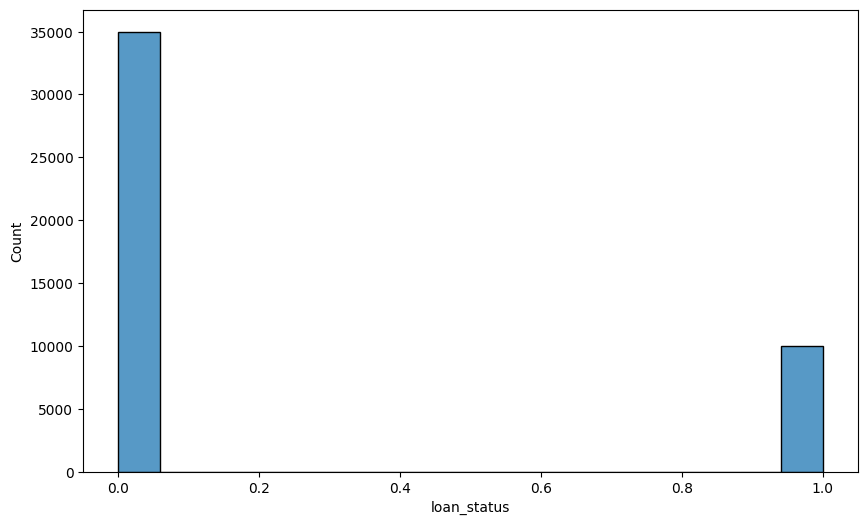

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='loan_status',data=data)
plt.show()

plt.show()

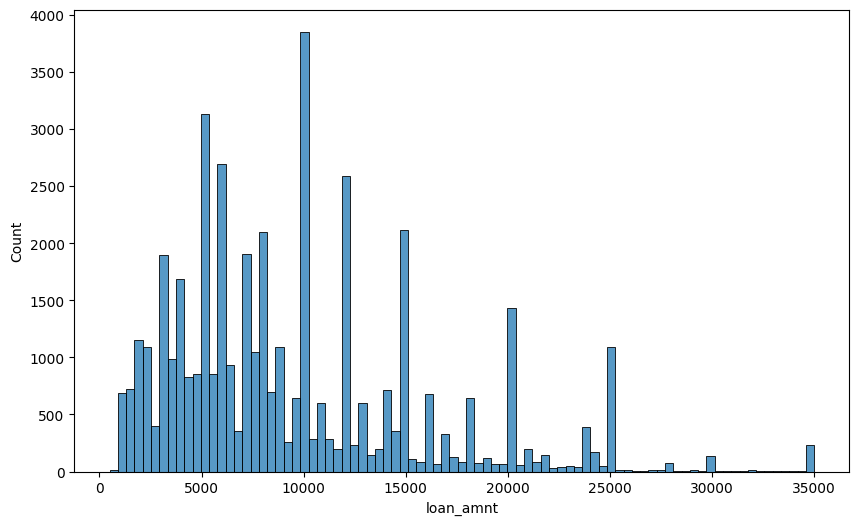

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='loan_amnt',data=data)
plt.show()

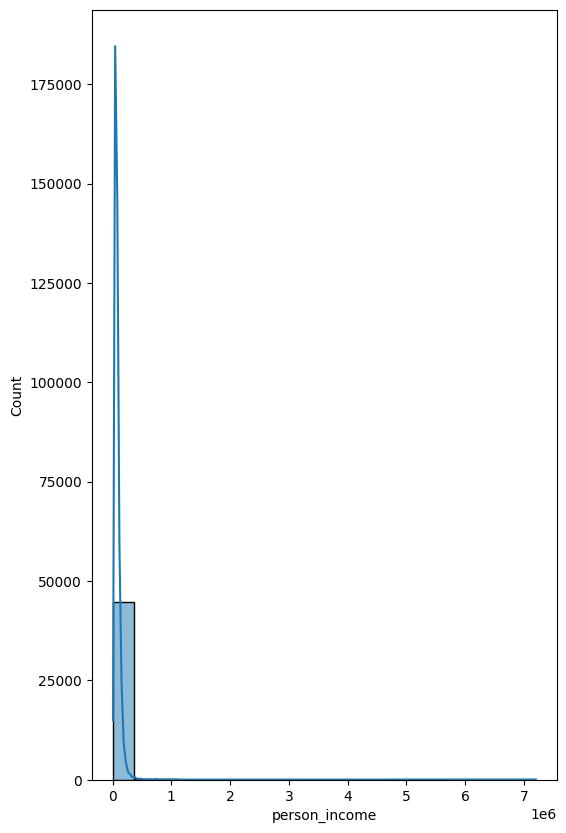

In [ ]:
plt.figure(figsize=(6,10))
sns.histplot(data['person_income'], bins=20 ,kde=True)
plt.show()

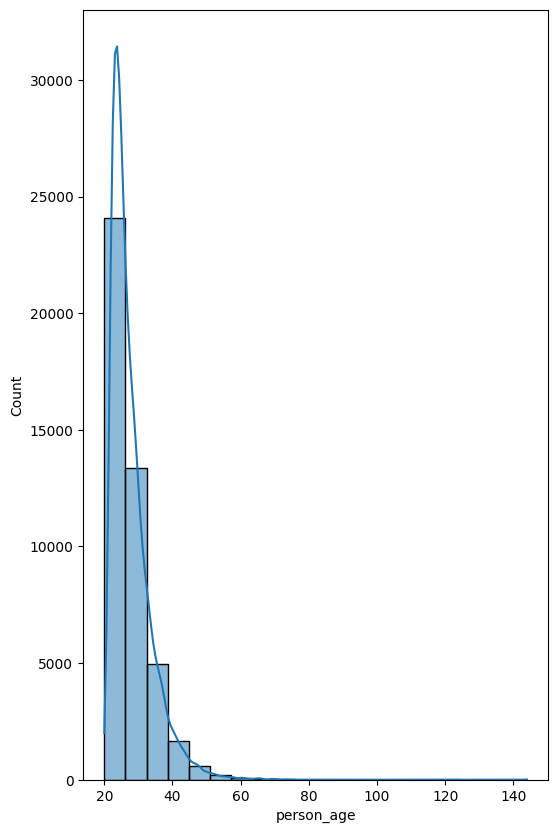

In [ ]:
plt.figure(figsize=(6,10))
sns.histplot(data['person_age'] ,bins=20,kde=True)
plt.show()

In [ ]:
#data2=data.loc[(data.loan_status==1)]

In [ ]:
#data2

In [ ]:
#data3=data.loc[(data.loan_status==0)]
#data3

In [ ]:
#corr_data2=data2.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation
#corr_data2
#plt.figure(figsize=(10,6))
#sns.heatmap(corr_data2,annot=True)
#plt.show

In [ ]:
#corr_data3=data3.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation
#corr_data2
#plt.figure(figsize=(10,6))
#sns.heatmap(corr_data3,annot=True)
#plt.show